<h1 style="text-align:center">Titanic: Machine Learning From Disaster</h1>

## 1. Introduction

### Importing libraries and datasets

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the Kaggle "../input/" directory.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

## 2. Exploring the training dataset

In [3]:
print("Shape of the training dataset:", df_train.shape)
df_train.head()

Shape of the training dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1 NaN values

In [4]:
df_train.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

As shown above, we have :
 * 20% missing values for Age
 * 77% missing values for Cabin
 * 2% missing values for Embarked  

Based on this, we decide to drop the Cabin feature as most of the data are missing. However we will keep the age and the Embarked categories.

In [5]:
df_train.drop(columns='Cabin', inplace=True)

### 2.2 _PClass_ feature

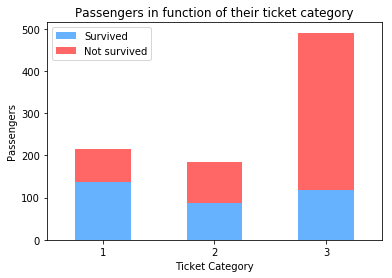

In [6]:
#df_train[['Survived', 'Pclass']][df_train['Pclass']==1].groupby('Survived').count()
df_category = pd.DataFrame({"Survived":[0,1]}).set_index('Survived')

for pclass in df_train['Pclass'].unique():
    df_category = df_category.join(df_train[['Survived', 'Pclass']][df_train['Pclass']==pclass].groupby('Survived').count(), on='Survived',rsuffix=pclass)
    df_category.rename(columns={"Pclass":pclass}, inplace=True)
#df_category.sort_index(ascending=False).T.sort_index()

df_category.sort_index(ascending=False).T.sort_index().plot(kind='bar', stacked=True, color=['#66B2FF', '#FF6666'])
plt.title("Passengers in function of their ticket category")
plt.xlabel("Ticket Category")
plt.ylabel("Passengers")
plt.xticks(rotation=0)
plt.legend(('Survived', 'Not survived'))
plt.show()

### 2.3 _Gender_ feature

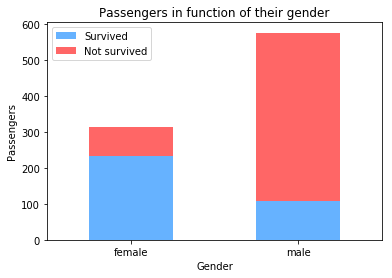

In [7]:
df_sex = pd.DataFrame({"Survived":[0,1]}).set_index('Survived')
for sex in df_train['Sex'].unique():
    df_sex = df_sex.join(df_train[['Survived', 'Sex']][df_train['Sex']==sex].groupby('Survived').count(), on='Survived',rsuffix=pclass)
    df_sex.rename(columns={"Sex":sex}, inplace=True)

df_sex.sort_index(ascending=False).T.sort_index().plot(kind='bar', stacked=True, color=['#66B2FF', '#FF6666'])

plt.title("Passengers in function of their gender")
plt.xlabel("Gender")
plt.ylabel("Passengers")
plt.xticks(rotation=0)
plt.legend(('Survived', 'Not survived'))
plt.show()

### 2.4 _Age_ feature

In [8]:
len(df_train['Age'].unique())

89

In [9]:
df_age_survived = df_train[['Age']][df_train['Survived']==1]
df_age_victims = df_train[['Age']][df_train['Survived']==0]
print("Nb victims :", df_age_victims.shape[0])
print("Nb NaN victims :",df_age_victims[df_age_victims['Age'].isna()].shape[0])
print("Nb survived :", df_age_survived.shape[0])
print("Nb NaN surviced :", df_age_survived[df_age_survived['Age'].isna()].shape[0])

#Need to deal with NaN values
#df_age_survived.dropna(inplace=True)
#df_age_victims.dropna(inplace=True)

Nb victims : 549
Nb NaN victims : 125
Nb survived : 342
Nb NaN surviced : 52


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


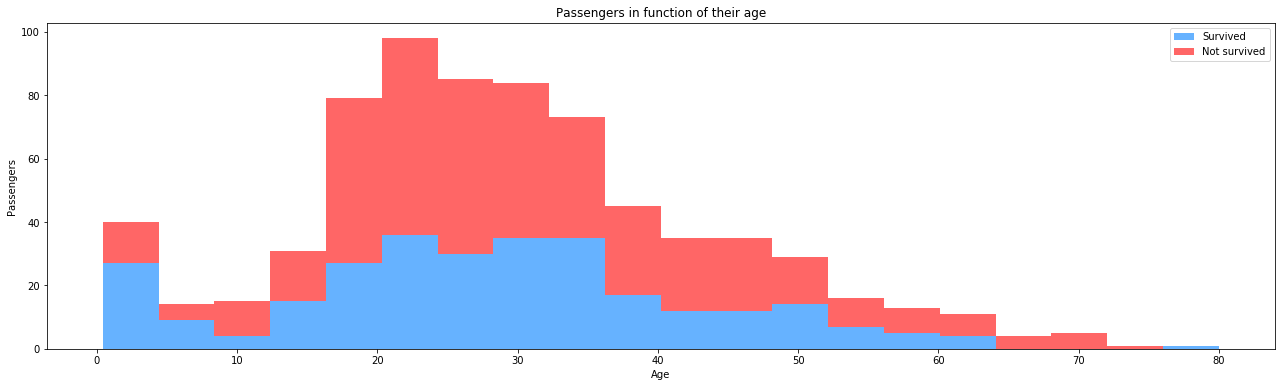

In [10]:
plt.figure(0,figsize=(22,6))
plt.hist([df_age_survived['Age'],df_age_victims['Age']],
          bins=20, stacked=True, color=['#66B2FF', '#FF6666'])

plt.title("Passengers in function of their age")
plt.xlabel("Age")
plt.ylabel("Passengers")
plt.xticks(rotation=0)
plt.legend(('Survived', 'Not survived'))
plt.show()

### 2.5 _Siblings & Spouses_ feature

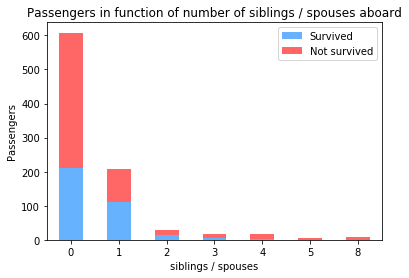

In [11]:
df_sibsp = pd.DataFrame({"Survived":[0,1]}).set_index('Survived')
i = 0
for sib in df_train['SibSp'].unique():
    i += 1
    df_sibsp = df_sibsp.join(df_train[['Survived', 'SibSp']][df_train['SibSp']==sib].groupby('Survived').count(), on='Survived',rsuffix=pclass)
    df_sibsp.rename(columns={"SibSp":sib}, inplace=True)
df_sibsp.replace(np.nan, 0, inplace=True)
df_sibsp.sort_index(ascending=False).T.sort_index()

df_sibsp.sort_index(ascending=False).T.sort_index().plot(kind='bar', stacked=True, color=['#66B2FF', '#FF6666'])

plt.title("Passengers in function of number of siblings / spouses aboard")
plt.xlabel("siblings / spouses")
plt.ylabel("Passengers")
plt.xticks(rotation=0)
plt.legend(('Survived', 'Not survived'))
plt.show()

### 2.6 _Parents & Children_ feature

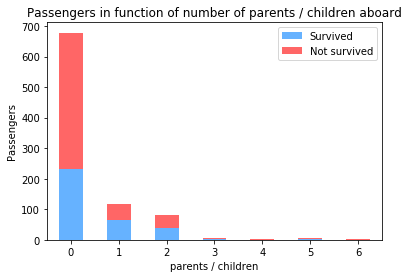

In [12]:
df_parch = pd.DataFrame({"Survived":[0,1]}).set_index('Survived')
i = 0
for parch in df_train['Parch'].unique():
    i += 1
    df_parch = df_parch.join(df_train[['Survived', 'Parch']][df_train['Parch']==parch].groupby('Survived').count(), on='Survived',rsuffix=pclass)
    df_parch.rename(columns={"Parch":parch}, inplace=True)
df_parch.replace(np.nan, 0, inplace=True)
df_parch.sort_index(ascending=False).T.sort_index()

df_parch.sort_index(ascending=False).T.sort_index().plot(kind='bar', stacked=True, color=['#66B2FF', '#FF6666'])

plt.title("Passengers in function of number of parents / children aboard")
plt.xlabel("parents / children")
plt.ylabel("Passengers")
plt.xticks(rotation=0)
plt.legend(('Survived', 'Not survived'))
plt.show()

### 2.7 _Title_ feature

In our dataset we are provided the name of each passenger in which their titles (such as Mrs, Miss, Mr or Master) are stated. Could this title has some importance in the survival rate ?

In [14]:
#Extract the title
title_list = []
for name in df_train['Name']:
    start = name.find(', ') + 2
    end = name.find('. ', start)
    title_list.append(name[start:end])
df_train['Title_Name'] = pd.Series(title_list)


In [15]:
print("List of unique title: \n", df_train['Title_Name'].unique())

df_train[['Survived', 'Title_Name']].groupby('Title_Name').count().rename(columns={"Survived":"Count"})

List of unique title: 
 ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


,Count
Title_Name,
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,182


In [16]:
df_train[df_train['Title_Name'].isin(['the Countess', 'Sir', 'Dr', 'Lady'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title_Name
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,Q,Dr
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,S,Dr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,S,Dr
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,C,Lady
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,C,Sir
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,C,Dr
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S,Dr
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,S,the Countess
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,C,Dr
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,Dr


### 2.8 Recap

Based on the previous analysis, we select the following features to develop our model:
 * _Sex_
 * _PClass_
 * _SibSp_ and _Parch_
 
About _Age_, maybe due to the number of NaN values,no obvious impact was spotted. Maybe a feature engineering process is reqiured to extract something useful.  
About the _Title_ extracted from the _Name_ feature, some work is required to regroup similar titles together and therefore being useful. However this category could be redundant because of the gender of each title, already used by the _Sex_ feature..

## 3. Training a model

In [17]:
num_features = ["SibSp", "Parch"]
cat_features = ["Pclass", "Sex"]
features = ["Survived"] + cat_features + num_features
df_data = pd.DataFrame(df_train[features])
df_data[['Pclass']] = df_data[['Pclass']].astype(str)
df_data.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


In [18]:
# using the get_dummies pandas method
df_onehot = pd.get_dummies(df_train[cat_features].astype(str), prefix="", prefix_sep="")
df_onehot.drop(columns='male', inplace=True)
df_onehot.head()

,1,2,3,female
0,0,0,1,0
1,1,0,0,1
2,0,0,1,1
3,1,0,0,1
4,0,0,1,0


In [19]:
df_data = df_onehot.join(df_train[num_features], how='outer')
df_data

,1,2,3,female,SibSp,Parch
0,0,0,1,0,1,0
1,1,0,0,1,1,0
2,0,0,1,1,0,0
3,1,0,0,1,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
886,0,1,0,0,0,0
887,1,0,0,1,0,0
888,0,0,1,1,1,2
889,1,0,0,0,0,0


In [20]:
X = np.asarray(df_data)
y = np.asarray(df_train['Survived'].astype(int))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 6) (712,)
Test set: (179, 6) (179,)


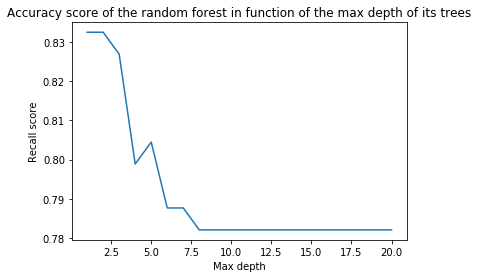

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

list_accuracy_score = []
for i in range(20):
    i +=1
    randomfor = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_depth=i, random_state=1)
    randomfor.fit(X_train,y_train)
    yhat_randomforest = randomfor.predict(X_test)
    list_accuracy_score.append(accuracy_score(y_test, yhat_randomforest))
    
plt.plot(np.array(range(20))+1, list_accuracy_score)
plt.xlabel('Max depth')
plt.ylabel('Recall score')
plt.title('Accuracy score of the random forest in function of the max depth of its trees')
plt.show()

In [23]:
randomfor = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_depth=5, random_state=1)
randomfor.fit(X_train,y_train)
yhat_randomforest = randomfor.predict(X_test)

In [24]:
from sklearn.metrics import jaccard_score
print('Jaccard score :', jaccard_score(y_test, yhat_randomforest))

from sklearn.metrics import classification_report
print (classification_report(y_test, yhat_randomforest))


from sklearn.metrics import recall_score
print ('Recall score :', recall_score(y_test, yhat_randomforest))
print ('Accuracy score :', accuracy_score(y_test, yhat_randomforest))

Jaccard score : 0.5333333333333333
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       119
           1       0.73      0.67      0.70        60

    accuracy                           0.80       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

Recall score : 0.6666666666666666
Accuracy score : 0.8044692737430168


## 4. Predictions

In [25]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [26]:
model_features = cat_features + num_features

df_data_test = pd.DataFrame(df_test[model_features])
df_data_test[['Pclass']] = df_data_test[['Pclass']].astype(str)

# using the get_dummies pandas method
df_onehot_test = pd.get_dummies(df_test[cat_features].astype(str), prefix="", prefix_sep="")
df_onehot_test.drop(columns='male', inplace=True)

df_data_test = df_onehot_test.join(df_test[num_features], how='outer')

X_test = np.asarray(df_data_test)
df_data_test

,1,2,3,female,SibSp,Parch
0,0,0,1,0,0,0
1,0,0,1,1,1,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,1,1,1
...,...,...,...,...,...,...
413,0,0,1,0,0,0
414,1,0,0,1,0,0
415,0,0,1,0,0,0
416,0,0,1,0,0,0


In [27]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## 5. Results

After submitting the exported files to the Kaggle competition platform, we scored a 78% accuracy.  
This result is really great based on the fact it came from only 5 raw features pushed to a simple classification algorithm, the random forest.  

Two ways to refine this result are identified:
 1. Managing feature engineering process to extract more relevant information in the left data;
 2. Applying another algorithm such as Gradient Boosting adjusted with more adequate parameters.
 